In [1]:
%matplotlib inline
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import math

from typing import List

In [2]:
def monthly_r2_score(month: int, models: List[str], data_path: Path = Path('data'), pred_year: int = 2018):
    
    model_files: Dict[str, xr.Dataset] = {}
    for model in models:
        pred_path = data_path / f'models/{model}/preds_{pred_year}_{month}.nc'
        model_files[model] = xr.open_dataset(pred_path)
    
    true_data = xr.open_dataset(data_path / f'features/test/{pred_year}_{month}/y.nc').isel(time=0)
    
    output_score: Dict[str, float] = {}
    
    for model, preds in model_files.items():
        diff = (true_data.VHI - preds.preds)
        notnan = ~np.isnan(diff.values)
        joined = true_data.merge(preds, join='inner')
        true_np, preds_np = joined.VHI.values[notnan].flatten(), joined.preds.values[notnan].flatten()
        
        score = r2_score(true_np, preds_np)
        print(f'For month {month}, model {model} has r2 score {score}')
        output_score[model] = score
    return output_score

In [3]:
monthly_scores = {'rnn': [], 'linear_network': [], 'month': []}
for month in range(1, 13):
    scores = monthly_r2_score(month=month, models=['linear_network', 'rnn'])
    
    for model, score in scores.items():
        monthly_scores[model].append(score)
    monthly_scores['month'].append(month)

For month 1, model linear_network has r2 score 0.685723664408184
For month 1, model rnn has r2 score 0.7001335714273946
For month 2, model linear_network has r2 score 0.3360257242239706
For month 2, model rnn has r2 score 0.5613834273337401
For month 3, model linear_network has r2 score -0.41875522271851806
For month 3, model rnn has r2 score -0.03325896056806066
For month 4, model linear_network has r2 score -0.02179870599417688
For month 4, model rnn has r2 score 0.2823248604349926
For month 5, model linear_network has r2 score 0.25422455792775467
For month 5, model rnn has r2 score 0.5128275586158659
For month 6, model linear_network has r2 score 0.469306894706251
For month 6, model rnn has r2 score 0.6447008237920814
For month 7, model linear_network has r2 score 0.3930511261142241
For month 7, model rnn has r2 score 0.5739500252821453
For month 8, model linear_network has r2 score 0.3826408271284254
For month 8, model rnn has r2 score 0.6763761049894517
For month 9, model linear_n

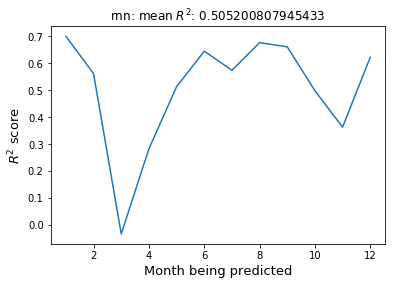

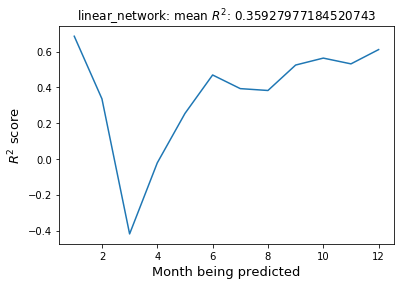

In [4]:
for model in ['rnn', 'linear_network']:
    plt.clf()
    plt.plot(monthly_scores['month'], monthly_scores[model])
    plt.xlabel('Month being predicted', size=13)
    plt.ylabel('$R^2$ score', size=13)
    plt.title(f'{model}: mean $R^2$: {np.mean(monthly_scores[model])}')
    plt.show()